# Part 1. Exploratory Data Analysis

Answers prepared by Bill Murphy 11/3/2019

## Introduction
In this evaluation we ask you questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short answer to the question.

#### Data
Use an online database >> The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

#### Purpose
Three main goals for you to demonstrate: 
a. Load in CSV files from the web. 
b. Create functions in python. 
C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 

#### Useful libraries for this test 
* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [5]:
# special IPython command to prepare the notebook for matplotlib
# minor changes to imports
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Additional imports
import seaborn as sns
import requests
import io
import zipfile

### Problem setup

There is evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. It's widely known now that baseball relies heavily on data science and other teams have started using these methods as well. Use exploratory data analysis to determine if the competitive advantage still exists. 

### Define Resuable constants

In [2]:
ds_yrs=[2002,2003] #years Oakland supposedly had advantage
last_5=list(range(1999,2004))

cmap='BuGn_r'

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). 

This task only uses the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [BytesIO](https://docs.python.org/3.7/library/io.html#binary-i-o) and [zipfile](https://docs.python.org/3.7/library/zipfile.html) modules to get from the web.   

In [36]:
# Zipfile Code copied from Stack Overflow

url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
r = requests.get(url,auth=('user','pass'))

mlz = zipfile.ZipFile(io.BytesIO(r.content))
print('Files contained in zip:')

for i,f in enumerate(mlz.namelist()):
    print('Index {}  \tFilename: {}'.format(i,f))

Files contained in zip:
Index 0  	Filename: SchoolsPlayers.csv
Index 1  	Filename: SeriesPost.csv
Index 2  	Filename: Teams.csv
Index 3  	Filename: TeamsFranchises.csv
Index 4  	Filename: TeamsHalf.csv
Index 5  	Filename: AllstarFull.csv
Index 6  	Filename: Appearances.csv
Index 7  	Filename: AwardsManagers.csv
Index 8  	Filename: AwardsPlayers.csv
Index 9  	Filename: AwardsShareManagers.csv
Index 10  	Filename: AwardsSharePlayers.csv
Index 11  	Filename: Batting.csv
Index 12  	Filename: BattingPost.csv
Index 13  	Filename: Fielding.csv
Index 14  	Filename: FieldingOF.csv
Index 15  	Filename: FieldingPost.csv
Index 16  	Filename: HallOfFame.csv
Index 17  	Filename: Managers.csv
Index 18  	Filename: ManagersHalf.csv
Index 19  	Filename: Master.csv
Index 20  	Filename: Pitching.csv
Index 21  	Filename: PitchingPost.csv
Index 22  	Filename: readme2013.txt
Index 23  	Filename: Salaries.csv
Index 24  	Filename: Schools.csv


In [37]:
salaries_df=pd.read_csv(mlz.open(mlz.namelist()[23]))
print('Part 1 of answer to Question 1')
salaries_df.head()

Part 1 of answer to Question 1


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [39]:
print('Part 2 of answer to Question 1')
teams_df=pd.read_csv(mlz.open(mlz.namelist()[2]))
teams_df.head(3)

Part 2 of answer to Question 1


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [40]:
team_sal=pd.DataFrame(salaries_df.groupby(['yearID','teamID'])['salary'].sum())\
.reset_index(drop=False).sort_values('salary',ascending=False)
team_sal.head()

,yearID,teamID,salary
815,2013,NYA,231978886
811,2013,LAN,223362196
575,2005,NYA,208306817
665,2008,NYA,207896789
725,2010,NYA,206333389


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [41]:
sal_wins=pd.merge(team_sal,teams_df[['yearID','teamID','W']],on=['yearID','teamID'],how='left')\
.sort_values(['yearID','teamID'],ascending=[False,True])
sal_wins.head()

,yearID,teamID,salary,W
134,2013,ARI,90132000,81
147,2013,ATL,87871525,96
163,2013,BAL,84393333,85
19,2013,BOS,151530000,97
45,2013,CHA,120065277,63


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

###  Analysis

The relationship between salary and wins can be restated as effciency (Wins per Dollar), which reduces the three axis problem ($/W/time) to two axes, and gives us a simlpler model to think about.

Before going too far in the analyis, it is good idea to get a big picture view of the salaries across the league.  A simple heatmap shows that Oakland is very near the bottom of team salaries 5 years before the period in question.  During 2003 season, Oakland remains in the bottom 25% of team salaries.  

This picture also gives us an idea on who to compare to use for comparison purposes, as teams like the Yankees and Dodgers seem to be perenially near the top of league spending (consistently light colors in heatmap below.)  

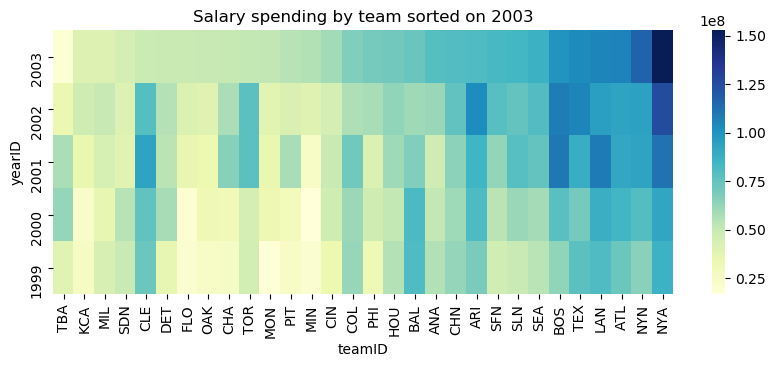

In [43]:
def show_annual_ranking(year):
    '''generate a heatmap to show relative salary spending for a particular year'''

    team_sals_a=salaries_df.loc[salaries_df.yearID.isin(last_5),:]\
    .pivot_table(index='teamID',columns='yearID',values='salary',aggfunc='sum')
    sal_year=team_sals_a.sort_values(year)
    sal_year=sal_year[[2003,2002,2001,2000,1999]]

    plt.figure(figsize=(10,3.5),dpi=100)
    sns.heatmap(sal_year.T,cmap='YlGnBu')
    plt.title('Salary spending by team sorted on {}'.format(year))
    plt.show()
    

#show_annual_ranking(1999)
show_annual_ranking(2003)

### Salary Efficiency

Small market teams don't have the salary budget that the larger market teams do, and must be much more efficient with their salary dollars to compete.    

The plot in the first cell shows salary efficiency (W/$) for the in the years in question (2002/3) across the league.   Oakland (team in question) is shown in Gold, LA Dodgers are shown in Dodger Blue, and the NY Yankees are shown in Navy (colors consistent on both team graphs.)  It is clear that though the salaries for 2002 and 2003 were significantly different, Oakland was very competitive in terms of wins despite a much smaller budget.

The boxplot in the next cell shows that 2002 and 2003 were not out of the norm.  In the five years shown, Oakland was among the most efficient teams in in the league.  Across timeframe, they were in the top 25% of teams in generating wins/$.  The larger market teams had big payrolls, but the incremenmental salary did not result in more wins.  What is also shown is that the hgiher salary teams have passed apparently the point of diminishing returns in terms of salary, and are perenially near the bottom in terms of salary efficiency.

Note:  I may not understand the question, as I had no idea what to do with the "for loop" hint. I am also assuming that a 2D plot is required by the question for printed material.  An interactive 3D scatter plot would be useful on either a website or this jupyter notebook.

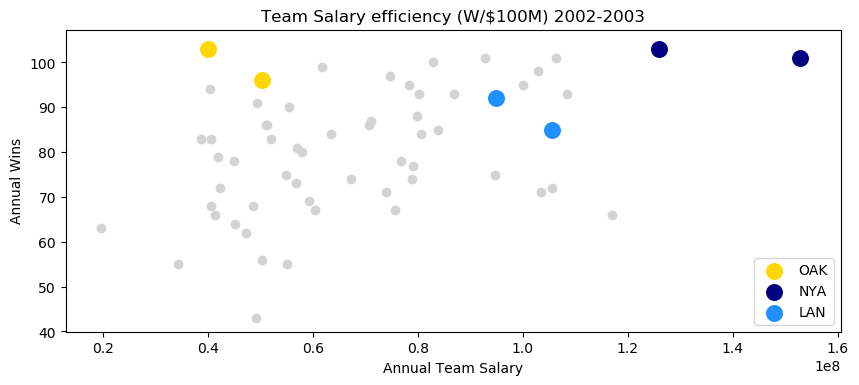

In [34]:
def make_scatter():
    '''Scatter plot 2002 2003'''
    y_20023=sal_wins.loc[sal_wins.yearID.isin([2002,2003]),:].sort_values('salary')
    plt.figure(figsize=(10,4),dpi=100)
    plt.scatter(y_20023['salary'],y_20023['W'],color='lightgrey')
    oakland=y_20023.loc[y_20023.teamID=='OAK',:]
    plt.scatter(oakland['salary'],oakland['W'],color='gold',s=125,label='OAK')
    nya=y_20023.loc[y_20023.teamID=='NYA',:]
    plt.scatter(nya['salary'],nya['W'],color='navy',s=125,label='NYA')
    lan=y_20023.loc[y_20023.teamID=='LAN',:]
    plt.scatter(lan['salary'],lan['W'],color='dodgerblue',s=125,label='LAN')
    plt.xlabel('Annual Team Salary')
    plt.ylabel('Annual Wins')
    plt.title('Team Salary efficiency (W/$100M) 2002-2003')
    plt.legend(loc='lower right')
    plt.show()
    
make_scatter()

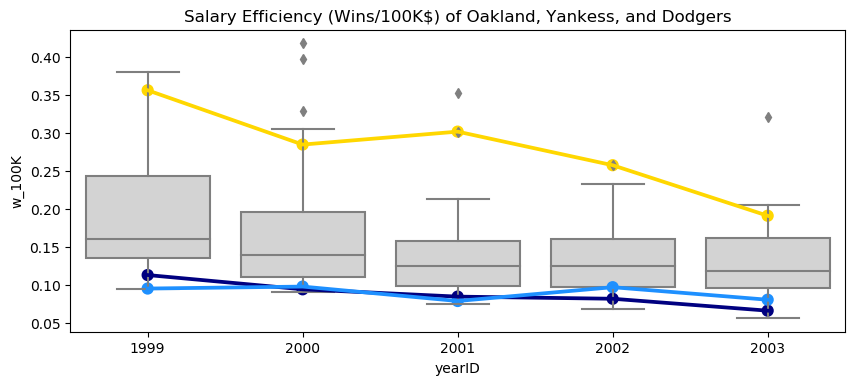

In [35]:
def make_histogram():
    sal_wins['w_100K']=(sal_wins['W']/sal_wins['salary'].astype(float))*100000
    sal_wins['yearID']=sal_wins['yearID'].astype(int)

    plt.figure(figsize=(10,4),dpi=100)
    l5=sal_wins.loc[sal_wins.yearID.isin(last_5),:].sort_values('yearID')
    sns.boxplot(x='yearID',y='w_100K',data=l5,
                color='lightgrey')

    oakland_eff=l5.loc[l5.teamID=='OAK',:]
    sns.pointplot(x='yearID',y='w_100K',data=oakland_eff,color='gold',size=12)

    yankees_eff=l5.loc[l5.teamID=='NYA',:]
    sns.pointplot(x='yearID',y='w_100K',data=yankees_eff,color='navy',size=12)

    dodgers_eff=l5.loc[l5.teamID=='LAN',:]
    sns.pointplot(x='yearID',y='w_100K',data=dodgers_eff,color='dodgerblue',size=12)

    plt.title('Salary Efficiency (Wins/100K$) of Oakland, Yankess, and Dodgers')

    plt.show()
    
make_histogram()

# Part 2. Web Development

## Introduction
At the Department of Biomedical Informatics the Data Core assists faculty members with the creation of tools to enable cutting edge research in multidisciplinary fields. Common tasks such as data warehousing, collection, or protection are not the expertise of the clinical faculty and it’s our job to be those specialists.

## Purpose
Show off your web development chops. Share with us an online repo demonstrating a recent project, something of the web app variety.  Add a detailed README that describes the purpose of the project if it doesn't already have one; include some design details and how the solution addresses the need. Good code is important but good communication is also key to helping others use what you've built. Alternatively if you don’t have a project repo to share, then complete the example project described below.

The goal here is to help us understand how you develop software as a whole, including design, documentation and testing. For this exercise, writing clear code with intentional design are the most important parts. We recognize that you probably have a lot of other things going on in your life and so this shouldn't consume more than a few hours. Submit what you think is appropriate and then we can talk through the what you've done.  We're looking to understand how you approach and solve problems. Please used either Python or Javascript for 

Deliverables should include:
- source code with instructions for launching the app
- any additional relevant files such as documentation or design diagrams

#### Example project description
A key project managed by DBMI is the Undiagnosed Diseases Network (UDN). The UDN platform is a web app that collects information about participants and allows hospitals, medical centers, and research staff share and review participant information.

For this test we would like you to create a small web app.  Specifically you should create two views: 1) add a participant by presenting a form that gathers details about a participant and 2) display a list of all participants with their data in a table. 

The form should have character input fields for 
- Participant Name
- Participant Age
- Does Participant have any siblings?
- Known environmental exposures
- Known genetic mutations

After submitting information you should be redirected to the list view where each participant and the values they entered are present. 

**Bonus:** Add a dropdown box for each participant that would have 3 values (Not Reviewed, Reviewed - Accepted, Reviewed - Not Accepted). Changing of this dropdown should save this field alongside the participant data.

